# 1. Data Exploration

## Loading and visualizing our data

In [1]:
import kagglehub
import os

dataset_path = "/kaggle/input/realwaste/realwaste-main/RealWaste"

# Get the list of class names (subdirectories inside RealWaste)
waste_categories = sorted(os.listdir(dataset_path))

# Print the categories
print("Waste Categories:", waste_categories)

print(os.listdir(dataset_path))

Waste Categories: ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
['Metal', 'Glass', 'Paper', 'Vegetation', 'Cardboard', 'Textile Trash', 'Food Organics', 'Plastic', 'Miscellaneous Trash']


In [2]:
from random import sample
import pandas as pd

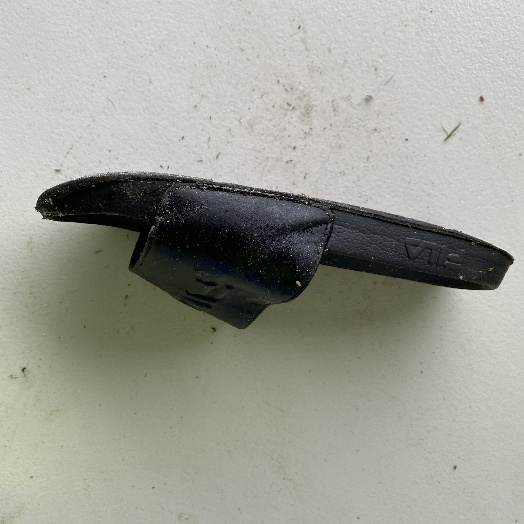

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img1 = load_img(f"{dataset_path}/Textile Trash/Textile Trash_108.jpg")
img1

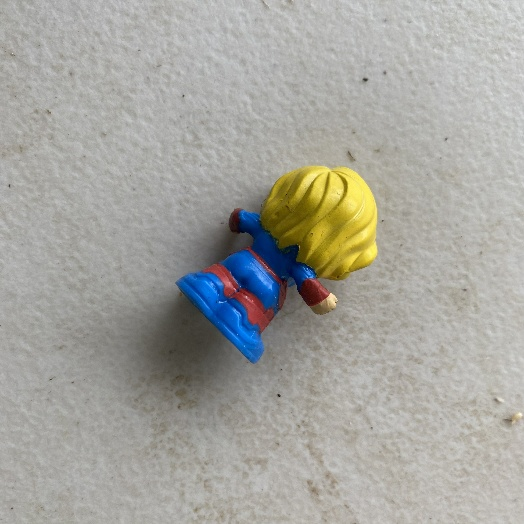

In [4]:
img2 = load_img(f"{dataset_path}/Miscellaneous Trash/Miscellaneous Trash_111.jpg")
img2

In [5]:
from PIL import Image  
import os
import matplotlib.pyplot as plt
from random import sample

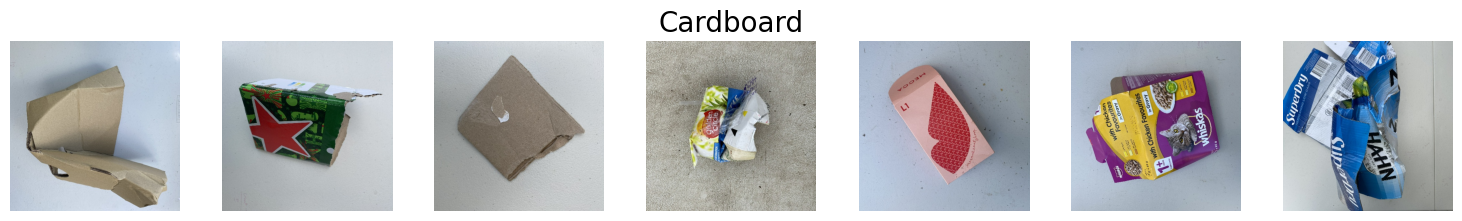

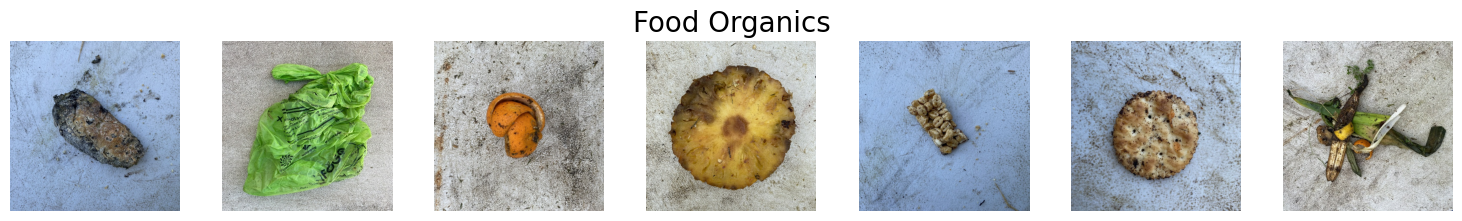

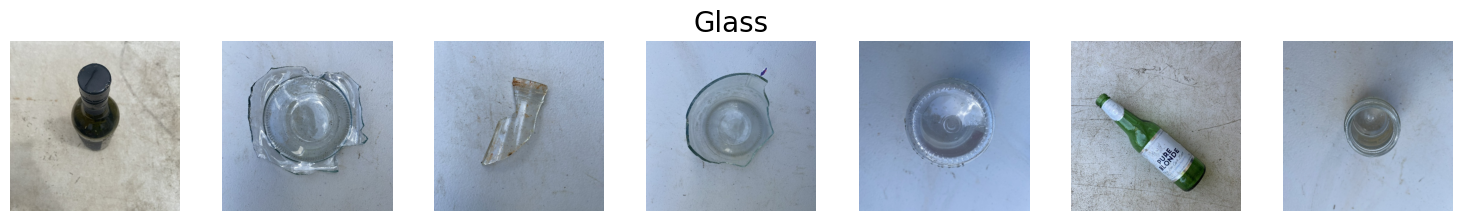

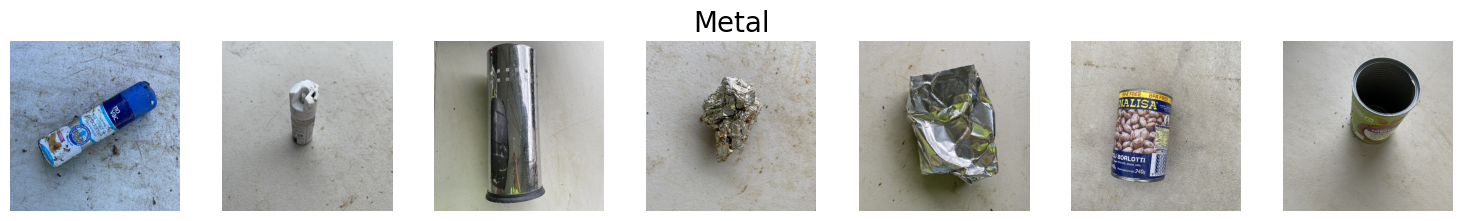

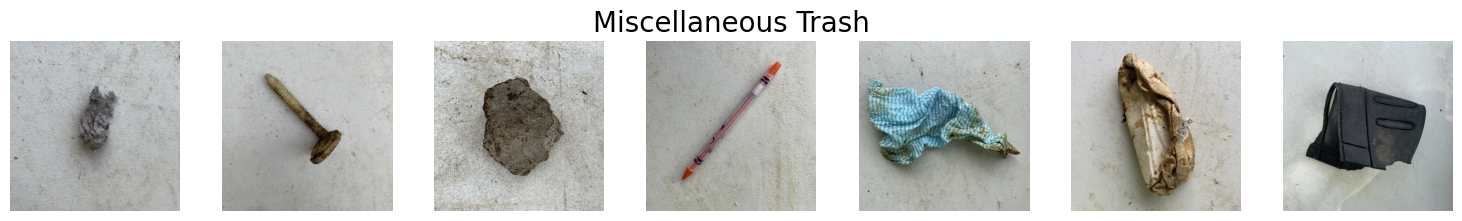

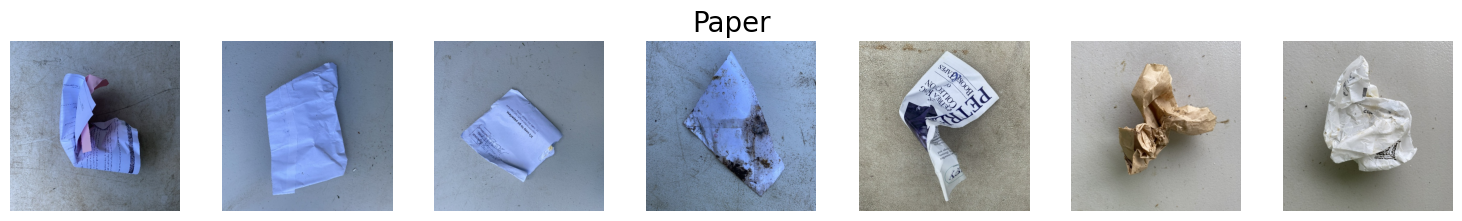

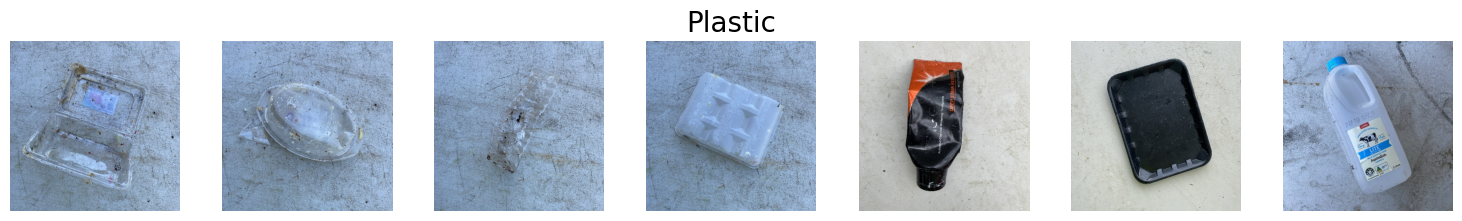

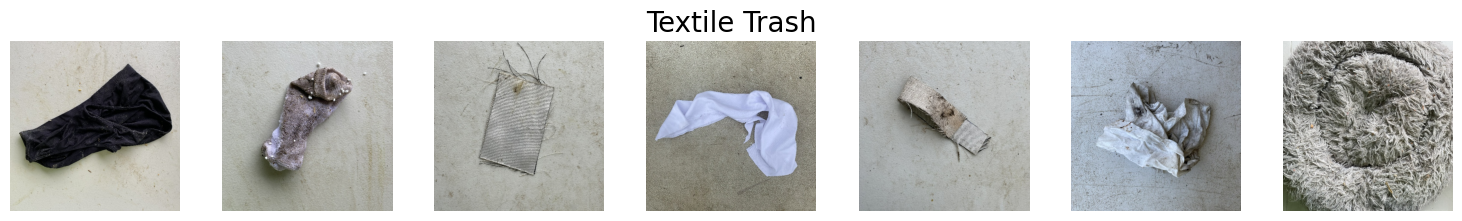

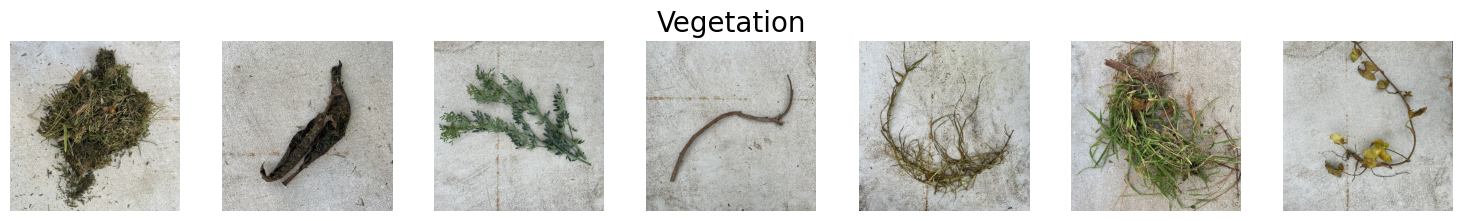

In [6]:
# Iterate over each trash type (folder) to display images
for waste_category in waste_categories:
    folder_path = os.path.join(dataset_path, waste_category)
    
    # Verify that the current item is a directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg'))]
        
        # Select 7 random images
        image_files = sample(image_files,7)

        # Set up subplots
        fig, axs = plt.subplots(1, 7, figsize=(15, 2))
        
        for i, image_file in enumerate(image_files):
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                axs[i].imshow(img)
                axs[i].axis('off')
        
        plt.tight_layout()
        fig.suptitle(waste_category, fontsize=20, y=1.08)
        plt.show()

## Checking image dimensions, properties and class distribution

In [7]:
import os
from PIL import Image

## Check Image Dimensions Before Splitting

# Retrieve the names of all folders (waste categories)
waste_categories = os.listdir(dataset_path)

# Set to store unique image dimensions
all_dimensions_set = set()

# Iterate over each category (folder) to process images
for category in waste_categories:
    folder_path = os.path.join(dataset_path, category)

    # Verify it's a valid directory
    if os.path.isdir(folder_path):
        image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]

        # Display the count of images in the current folder
        print(f"{category} folder contains {len(image_files)} images.")

        # Loop through each image to check its dimensions
        for image_file in image_files:
            image_path = os.path.join(folder_path, image_file)
            with Image.open(image_path) as img:
                width, height = img.size
                channels = len(img.getbands())
                all_dimensions_set.add((width, height, channels))

# Print summary of image dimensions
if len(all_dimensions_set) == 1:
    width, height, channels = all_dimensions_set.pop()
    print(f"\n✅ All images in the dataset have the same dimensions: {width}x{height} with {channels} color channels.")
else:
    print("\n⚠️ The images in the dataset have different dimensions or color channels:")
    print(all_dimensions_set)

Metal folder contains 790 images.
Glass folder contains 420 images.
Paper folder contains 500 images.
Vegetation folder contains 436 images.
Cardboard folder contains 461 images.
Textile Trash folder contains 318 images.
Food Organics folder contains 411 images.
Plastic folder contains 921 images.
Miscellaneous Trash folder contains 495 images.

✅ All images in the dataset have the same dimensions: 524x524 with 3 color channels.


## Creating a dataframe to prepare for preprocessing 

In [8]:
# Initialize an empty list to store image file paths and their respective labels
data = []

# Loop through each waste type and collect its images' file paths
for waste_category in waste_categories:
    for file in os.listdir(os.path.join(dataset_path, waste_category)):
        # Append the image file path and its trash type (as a label) to the data list
        data.append((os.path.join(dataset_path, waste_category, file), waste_category))

# Convert the collected data into a DataFrame
df = pd.DataFrame(data, columns=['filepath', 'label'])

# Display the first few entries of the DataFrame
df.sample(20)

filepath                label
1329  /kaggle/input/realwaste/realwaste-main/RealWas...                Paper
2203  /kaggle/input/realwaste/realwaste-main/RealWas...            Cardboard
3154  /kaggle/input/realwaste/realwaste-main/RealWas...        Food Organics
4355  /kaggle/input/realwaste/realwaste-main/RealWas...  Miscellaneous Trash
1090  /kaggle/input/realwaste/realwaste-main/RealWas...                Glass
3891  /kaggle/input/realwaste/realwaste-main/RealWas...              Plastic
2537  /kaggle/input/realwaste/realwaste-main/RealWas...            Cardboard
59    /kaggle/input/realwaste/realwaste-main/RealWas...                Metal
3237  /kaggle/input/realwaste/realwaste-main/RealWas...        Food Organics
2853  /kaggle/input/realwaste/realwaste-main/RealWas...        Textile Trash
1462  /kaggle/input/realwaste/realwaste-main/RealWas...                Paper
4289  /kaggle/input/realwaste/realwaste-main/RealWas...  Miscellaneous Trash
4292  /kaggle/input/realwaste/realwaste-main/RealWas...  Miscellaneous Trash
1999  /kaggle/input/realwaste/realwaste-main/RealWas...           Vegetation
3265  /kaggle/input/realwaste/realwaste-main/RealWas...        Food Organics
2983  /kaggle/input/realwaste/realwaste-main/RealWas...        Food Organics
3697  /kaggle/input/realwaste/realwaste-main/RealWas...              Plastic
3568  /kaggle/input/realwaste/realwaste-main/RealWas...              Plastic
1060  /kaggle/input/realwaste/realwaste-main/RealWas...                Glass
859   /kaggle/input/realwaste/realwaste-main/RealWas...                Glass

# 2. Data Preprocessing

In [9]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

from tensorflow.keras.utils import image_dataset_from_directory

from sklearn.model_selection import train_test_split

# 3. Data Preprocessing

In [10]:
!pip install split-folders

## Data splitting for model training

In [11]:
dataset_path = "/kaggle/input/realwaste/realwaste-main/RealWaste"
print(os.listdir(dataset_path))  # Check if it contains the classes


['Metal', 'Glass', 'Paper', 'Vegetation', 'Cardboard', 'Textile Trash', 'Food Organics', 'Plastic', 'Miscellaneous Trash']


In [12]:
import splitfolders

# Define destination (writable) directory in Kaggle
dataset_path = "/kaggle/input/realwaste/realwaste-main/RealWaste"
output_path = "/kaggle/working/RealWaste_split_data"

splitfolders.ratio(dataset_path, output=output_path, seed=1337, ratio=(0.7, 0.1, 0.2))

# Define split ratios
split_ratios = (0.7, 0.1, 0.2)  # Train: 70%, Val: 10%, Test: 20%

# Split the dataset
splitfolders.ratio(dataset_path, output=output_path, seed=1337, ratio=split_ratios)

print("✅ Dataset successfully split into Train (70%), Val (10%), and Test (20%) with stratification!")

Copying files: 4752 files [00:11, 426.69 files/s]
Copying files: 4752 files [00:11, 406.15 files/s]

✅ Dataset successfully split into Train (70%), Val (10%), and Test (20%) with stratification!


In [13]:
#import os
#print("Folders in output path:", os.listdir(output_path))
#print("Test set contents:", os.listdir(os.path.join(output_path, "test")))
#
#test_path = os.path.join(output_path, "test")
#print("Test folder contents:", os.listdir(test_path))

## Define paths

In [14]:
# Define Paths for Your Dataset
train_data_dir = "/kaggle/working/RealWaste_split_data/train/"
val_data_dir = "/kaggle/working/RealWaste_split_data/val/"
test_data_dir = "/kaggle/working/RealWaste_split_data/test/"

# Define Batch Size
batch_size = 64

## Data Augmentation

### Resizing, random flip, rotation, zoom, contrast & brightness, and translation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [16]:
# Data Augmentation (Applied Only to Training Set)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25),  
    layers.RandomZoom(0.15),  
    layers.RandomContrast(0.1),  
    layers.RandomTranslation(0.15, 0.15),  
    layers.RandomBrightness(0.1),  
])

## Resizing

In [17]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Resizing, Rescaling
from tensorflow.keras import layers

In [18]:
# Define the preprocessing layer for resizing (no normalization since the resnet model takes care of that)
preprocessing_layer = Sequential([
    layers.Resizing(384, 384),  # Resize images to 384x384 to match original model's input size
])

# Check if it works
print("Preprocessing Layer:", preprocessing_layer)

Preprocessing Layer: <Sequential name=sequential_1, built=False>


In [19]:
# Define Preprocessing Functions

# Apply Normalization + Augmentation for Training Set
def preprocess_train(image, label):
    image = preprocessing_layer(image)  # Resize 
    image = data_augmentation(image)    # Augment
    return image, label

# Apply Only Normalization for Validation/Test Sets
def preprocess_val_test(image, label):
    image = preprocessing_layer(image)  # Resize 
    return image, label

## Building the Dataset Pipeline: Loading, Augmentation & Preprocessing

In [20]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [21]:
import os
print(os.listdir("/kaggle/working/RealWaste_split_data/"))


['train', 'val', 'test']


In [22]:
# Training Data (with augmentation)
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_train)

# Validation Data (no augmentation)
val_ds = image_dataset_from_directory(
    val_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_val_test)

# Test Data (no augmentation)
test_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    batch_size=batch_size,
    label_mode="categorical"
).map(preprocess_val_test)

print("✅ Datasets Ready: Training (with Augmentation), Validation & Test (only Normalization)")

Found 3323 files belonging to 9 classes.
Found 473 files belonging to 9 classes.
Found 956 files belonging to 9 classes.
✅ Datasets Ready: Training (with Augmentation), Validation & Test (only Normalization)


# 4. Basic CNN Model Training

## Define Sequential CNN Model

In [23]:
# Define CNN Model
#model = Sequential([
    #layers.Input((224, 224, 3)),  # Match the resized image shape

    # Feature Extraction
    #layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    #layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    #layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    #layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    # Flatten for Dense Layers
    #layers.Flatten(),
    #layers.Dense(512, activation="relu"),  # More neurons for learning complex patterns
    #layers.Dropout(0.5),
    #layers.Dense(6, activation="softmax")  # 6 output classes (plastic, paper, etc.)
#])

# Compile Model
#adam = optimizers.Adam(learning_rate=0.001)
#model.compile(
 #   loss='categorical_crossentropy',
  #  optimizer=adam,
   # metrics=['accuracy']
#)

# Show Model Summary
#model.summary()

## Fine Tuning

In [24]:
# Define Callbacks (To Improve Training)

#MODEL_PATH = "best_model.keras"

#modelCheckpoint = callbacks.ModelCheckpoint(
 #   MODEL_PATH, monitor="val_loss", verbose=0, save_best_only=True
#)

#LRreducer = callbacks.ReduceLROnPlateau(
#    monitor="val_loss", factor=0.1, patience=3, verbose=1, min_lr=0
#)

#EarlyStopper = callbacks.EarlyStopping(
#    monitor='val_loss', patience=10, verbose=0, restore_best_weights=True
#)

# 5. Transfer Learning Model Training

In [25]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model

## Loading previously created transfer resnet5 model baseline

In [26]:
from tensorflow.keras.models import load_model

MODEL_PATH = "custom_resnet50_model_v3.keras" 
model = load_model("/kaggle/input/transfer_resnet5_model_baseline.keras/tensorflow2/default/1/custom_resnet50_model_v3.keras")

## Freezing some layers to keep knowledge

In [27]:
for layer in model.layers[:143]:  # Example: Freeze first 143 layers
    layer.trainable = False

for layer in model.layers[143:]:  # Unfreeze last layers
    layer.trainable = True

In [28]:
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

## Fine tune on new dataset

### Creating model with updated output layer

In [29]:
from tensorflow.keras import Model, layers

# Remove the last layer and replace it with a new one (for 9 categories)
x = layers.Dense(9, activation="softmax")(model.layers[-2].output)  # channging from 6 to 9

# Create a new model with the updated output layer
model = Model(inputs=model.input, outputs=x)

# Compile 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


## Training new resnet50 baseline transfer model 

In [30]:
history = model.fit(train_ds,  
                    validation_data=val_ds,
                    epochs=20,  
                    callbacks=[ReduceLROnPlateau(monitor="val_loss", patience=3),
                               EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.4348 - loss: 1.6227 - val_accuracy: 0.7315 - val_loss: 0.7254 - learning_rate: 1.0000e-04
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.7918 - loss: 0.6028 - val_accuracy: 0.8055 - val_loss: 0.5147 - learning_rate: 1.0000e-04
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.8601 - loss: 0.3953 - val_accuracy: 0.8499 - val_loss: 0.4478 - learning_rate: 1.0000e-04
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.8864 - loss: 0.3124 - val_accuracy: 0.8584 - val_loss: 0.3943 - learning_rate: 1.0000e-04
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.9192 - loss: 0.2235 - val_accuracy: 0.8626 - val_loss: 0.3684 - learning_rate: 1.0000e-04
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.9414 - loss: 0.1752 - val_accuracy: 0.8858 - val_loss: 0.3309 - learning_rate: 1.0000e-04
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 186s 4s/step - accuracy: 0.9546 